## **Simple Neural Network with Keras and TensorFlow 2**

As first hands-on example of the course, the goal is to give a thorough understanding of the end-to-end deep learning cycle with Keras in a simple way. 

In this example you will deal with a very simple and popular example dataset called MNIST, which comes inbuilt with Keras. [You can read all about the dataset here](http://yann.lecun.com/exdb/mnist/)

This example is divided into the following parts:
1. Preprocessing the data
2. Creating the simple densely connected model
3. Training the model
4. Adding callbacks
5. Testing and evaluating the model
6. Improving the performance

We will go through each part sequentially, gradually building upon the concepts

### **Overview of the dataset**

- The MNIST dataset consists of grayscale images of handwritten digits (0 to 9). 
- Each image is of dimension 28x28.
- Dataset contains 60000 Training images and 10000 Test images
- The dataset comes inbuilt with tf.keras, with normalized images, separated into training and testing sets   

![MNIST](https://upload.wikimedia.org/wikipedia/commons/2/27/MnistExamples.png)

### **What we are building**

We are building an image classifier capable of identifying handwritten digits ranging from 0 to 9. To train the model, we will use the training set of 60000 images and the rest 10000 testing set to test the model later on. 

- Our neural network will be a fully connected (densely connected) neural network.
- Input layer of 784 input (28x28 image pixels)
- 2 hidden fully connected layers of 256 nodes each (this number may change as we play around with the network)
- output layer with 10 nodes (1 node for each digit from 0 to 9)

> **input layer[754] --> dense1[256] --> dense2[256] --> output[10]** 

### **Part 1 - Preprocessing the dataset**

In this part we will fetch the dataset from keras, visualize the dataset, and perform some preprocessing steps so that we can prepare our dataset to be fed into the neural network for training. 

One of the most important of preprocessing steps involve **flattening the images.** Our images are 28x28 in dimension, but the network we are training is a fully connected network and accepts only one-dimension matrix individual inputs. So this step will be like unrolling a barrel. Here's how it looks like --
> [1 0] <br> 
> [3 4]   --> [1 0 3 4 7 8] <br>
> [7 8]

In [1]:
## import preprocessing libraries
from tensorflow.keras.datasets import mnist
from tensorflow.keras.utils import to_categorical

import numpy as np
import matplotlib.pyplot as plt
import random

In [2]:
## fetch the mnist dataset
(x_train, y_train), (x_test, y_test) = mnist.load_data()

11493376/11490434 [==============================] - 0s 0us/step


In [3]:
## Check the data shape
print("x_train: ", x_train.shape)
print("y_train: ", y_train.shape)
print("x_test: ", x_test.shape)
print("y_test: ", y_test.shape)

x_train:  (60000, 28, 28)
y_train:  (60000,)
x_test:  (10000, 28, 28)
y_test:  (10000,)


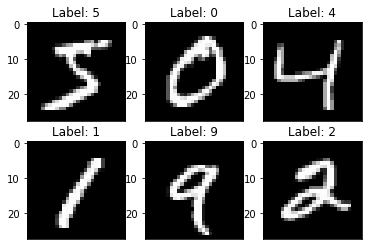

In [4]:
## Lets plots the images
fig = plt.figure()

for i in range(6):
  plt.subplot(2, 3, i+1)
  plt.imshow(x_train[i], cmap='gray', interpolation='none') ## image
  plt.title(f"Label: {y_train[i]}")
  plt.xticks([])
fig.show();

In [5]:
## Lets take a look at a single image data
NUM = 0

print(f"Label: {y_train[NUM]}")
print("Shape: ", x_train[NUM].shape)
print("*"*50)
digit = x_train[NUM]
print(digit)

Label: 5
Shape:  (28, 28)
**************************************************
[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   3  18  18  18 126 136
  175  26 166 255 247 127   0   0   0   0]
 [  0   0   0   0   0   0   0   0  30  36  94 154 170 253 253 253 253 253
  225 172 253 242 195  64   0   0   0   0]
 [  0   0   0   0   0   0   0  49 238 253 253 253 253 253 253 253 253 251
   93  82  82  56  39   0   0 

In [6]:
#Prettify the print
for i in digit:
    print(*i, sep=" ")

0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
0 0 0 0 0 0 0 0 0 0 0 0 3 18 18 18 126 136 175 26 166 255 247 127 0 0 0 0
0 0 0 0 0 0 0 0 30 36 94 154 170 253 253 253 253 253 225 172 253 242 195 64 0 0 0 0
0 0 0 0 0 0 0 49 238 253 253 253 253 253 253 253 253 251 93 82 82 56 39 0 0 0 0 0
0 0 0 0 0 0 0 18 219 253 253 253 253 253 198 182 247 241 0 0 0 0 0 0 0 0 0 0
0 0 0 0 0 0 0 0 80 156 107 253 253 205 11 0 43 154 0 0 0 0 0 0 0 0 0 0
0 0 0 0 0 0 0 0 0 14 1 154 253 90 0 0 0 0 0 0 0 0 0 0 0 0 0 0
0 0 0 0 0 0 0 0 0 0 0 139 253 190 2 0 0 0 0 0 0 0 0 0 0 0 0 0
0 0 0 0 0 0 0 0 0 0 0 11 190 253 70 0 0 0 0 0 0 0 0 0 0 0 0 0
0 0 0 0 0 0 0 0 0 0 0 0 35 241 225 160 108 1 0 0 0 0 0 0 0 0 0 0
0 0 0 0 0 0 0 0 0 0 0 0 0 81 240 253 253 119 25 0 0 0 0 0 0 0 0 0
0 0 0 0 0 0 0 0

##### **As can be seen above, each image consists of 28x28 grayscale pixels ranging from 0 to 255**

### **Preparing the input data**

For this step we will unroll each input image and convert it into a single dimension matrix. To do this we will reshape our input data images to 784
> for example, (60000, 28, 28) --> Reshape --> (60000, 784)  

In [7]:
x_train = x_train.reshape(60000, 784) # flatten training data
x_test = x_test.reshape(10000, 784) # flatten test data

In [8]:
## change the data type to float
x_train = x_train.astype('float')
x_test = x_test.astype('float')

**Normalize the dataset**

[here's a good article on normalization](https://arthurdouillard.com/post/normalization/)

In [9]:
## normalize / scale the image data
x_train /= 255
x_test /= 255

In [10]:
## check the data after processing
print(x_train.shape, x_test.shape)

print(max(x_train[0]), max(x_test[0]))

(60000, 784) (10000, 784)
1.0 1.0


#### **Process the labels**
Currently the labels are raw and single digit representation. We will need to convert these labels to one-hot encoded matrices. 

>5 = [0, 0, 0, 0, 0, 1, 0, 0, 0, 0]

[Check out one-hot encoding here](https://hackernoon.com/what-is-one-hot-encoding-why-and-when-do-you-have-to-use-it-e3c6186d008f)


In [11]:
NUM_CLASSES = 10 

y_train = to_categorical(y_train, num_classes=NUM_CLASSES)
y_test = to_categorical(y_test, num_classes=NUM_CLASSES)

In [12]:
print(y_train.shape, y_train[0])
print(y_test.shape, y_test[0])

(60000, 10) [0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]
(10000, 10) [0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]


### **Part 2 - Creating the Neural Network**

We will use the Sequential class of Keras to build this simple neural network. The Sequential class is pretty popular to quickly stack layers of neural network to build the network  

In [13]:
## importing the relevant libraries
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation

In [14]:
## create the model instance

model = Sequential()

In [15]:
## add first layer 

model.add(Dense(256, input_shape=(784,))) # make sure you put comma after 784, this represents a tuple, which should be the input for input layer 

#### Adding the activation layer can be done in two ways 
- Use the Actvation layer seperately 
- Define the activation funtion in the layer itself 

[Check out this article about activation functions](https://medium.com/the-theory-of-everything/understanding-activation-functions-in-neural-networks-9491262884e0)

In [16]:
## add activation layer
model.add(Activation('relu'))

In [17]:
## add second layer along with activation
model.add(Dense(256, activation="relu"))

In [18]:
## add the last layer
model.add(Dense(10, activation="softmax")) ## we have ten output labels

In [19]:
## lets get an overview of the network we put together so far
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 256)               200960    
_________________________________________________________________
activation (Activation)      (None, 256)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 256)               65792     
_________________________________________________________________
dense_2 (Dense)              (None, 10)                2570      
Total params: 269,322
Trainable params: 269,322
Non-trainable params: 0
_________________________________________________________________


#### **Whats missing now?**

We have the network in place, we have defined the layers, actvations functions and stuff, but, we have not yet defined important **hyperparameters** such as loss function, learning rate, optimizer, and metrics

[More about learning rates](https://towardsdatascience.com/understanding-learning-rates-and-how-it-improves-performance-in-deep-learning-d0d4059c1c10)

#### **We compile the model to define the hyperparameters, basically, we define model properties and finalise the model**

In [20]:
## compiling the model
model.compile(loss="categorical_crossentropy", optimizer="sgd", metrics=["accuracy"])

In [21]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 256)               200960    
_________________________________________________________________
activation (Activation)      (None, 256)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 256)               65792     
_________________________________________________________________
dense_2 (Dense)              (None, 10)                2570      
Total params: 269,322
Trainable params: 269,322
Non-trainable params: 0
_________________________________________________________________


### **Part 3 - Training the network**

This is the part where we train the network that we have built. 

In [22]:
## Lets first confirm that GPU is available :)
!nvidia-smi

Wed Jul  1 13:57:37 2020       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 450.36.06    Driver Version: 418.67       CUDA Version: 10.1     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla K80           Off  | 00000000:00:04.0 Off |                    0 |
| N/A   52C    P0    70W / 149W |    133MiB / 11441MiB |      0%      Default |
|                               |                      |                 ERR! |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

In [23]:
import tensorflow as tf
tf.__version__

'2.2.0'

In [24]:
tf.config.list_physical_devices('GPU')

[PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]

#### **Prepare for training**

We need to figure out certain parameters like number of epochs, batch_size, and many more.. Lets start with the simplest ones

[Article on epochs, batch size, and iterations](https://towardsdatascience.com/epoch-vs-iterations-vs-batch-size-4dfb9c7ce9c9#:~:text=the%20data%20given.-,Epochs,it%20in%20several%20smaller%20batches.)

In [25]:
EPOCHS = 10
BATCH_SIZE = 128

In [26]:
history = model.fit(  ## we save the training result in history variable
    x=x_train,  ## training images 
    y=y_train,  ## training labels
    epochs=EPOCHS,  ## number of epochs
    batch_size=BATCH_SIZE,  ## define the batch size
    shuffle=True,   ## lets shuffle the inputs
    validation_split=0.2 ## 20% training data will be used as validation data
)

Epoch 1/10
375/375 [==============================] - 2s 5ms/step - loss: 1.2945 - accuracy: 0.6843 - val_loss: 0.6417 - val_accuracy: 0.8573
Epoch 2/10
375/375 [==============================] - 2s 4ms/step - loss: 0.5386 - accuracy: 0.8653 - val_loss: 0.4211 - val_accuracy: 0.8929
Epoch 3/10
375/375 [==============================] - 2s 4ms/step - loss: 0.4119 - accuracy: 0.8888 - val_loss: 0.3550 - val_accuracy: 0.9054
Epoch 4/10
375/375 [==============================] - 2s 4ms/step - loss: 0.3604 - accuracy: 0.9005 - val_loss: 0.3213 - val_accuracy: 0.9120
Epoch 5/10
375/375 [==============================] - 2s 4ms/step - loss: 0.3299 - accuracy: 0.9072 - val_loss: 0.3006 - val_accuracy: 0.9168
Epoch 6/10
375/375 [==============================] - 2s 4ms/step - loss: 0.3084 - accuracy: 0.9133 - val_loss: 0.2838 - val_accuracy: 0.9215
Epoch 7/10
375/375 [==============================] - 2s 5ms/step - loss: 0.2915 - accuracy: 0.9170 - val_loss: 0.2698 - val_accuracy: 0.9244
Epoch 

In [27]:
## check out the result
print(history.history.keys())

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


In [28]:
for i in history.history.keys():
  print(history.history[i])

[1.2945365905761719, 0.5386118292808533, 0.4118572473526001, 0.36038127541542053, 0.3299453854560852, 0.30840611457824707, 0.2915361225605011, 0.2772360146045685, 0.2651374042034149, 0.2543209493160248]
[0.6842708587646484, 0.8653333187103271, 0.8888333439826965, 0.9004583358764648, 0.9072291851043701, 0.9132708311080933, 0.916979193687439, 0.921541690826416, 0.9248541593551636, 0.9280833601951599]
[0.6416988372802734, 0.42112287878990173, 0.3549993634223938, 0.321270614862442, 0.3006197214126587, 0.2838347554206848, 0.26983773708343506, 0.26079368591308594, 0.24994391202926636, 0.24188682436943054]
[0.8573333621025085, 0.8929166793823242, 0.9054166674613953, 0.9120000004768372, 0.9167500138282776, 0.921500027179718, 0.9244166612625122, 0.9273333549499512, 0.9297500252723694, 0.9314166903495789]


#### **Plotting the result**

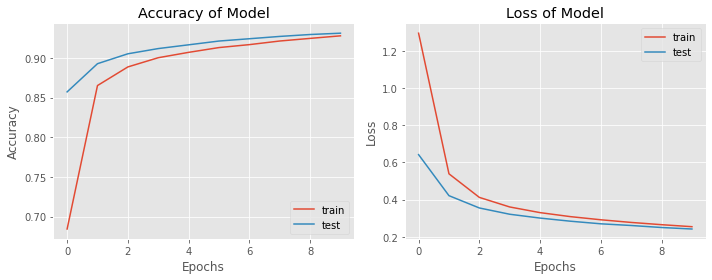

In [29]:
plt.style.use('ggplot') ## use ggplot style sheet. Its just prettier :)

fig = plt.figure(figsize=(10, 4))
## accuracy plot
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Accuracy of Model')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend(['train', 'test'], loc='lower right')

## loss plot
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Loss of Model')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend(['train', 'test'], loc='upper right')

plt.tight_layout()

fig.show();

#### **Saving and loading the model**

Models can be saved in two ways
1. Whole models
  - Whole models can be saved using model.save() or tf.keras.models.save_model() function.
  - Models are saved in the TF SavedModel format by default
  - Models are saved as HDF5 files if the specified format is 'h5' or file extension is '.h5' 
  >[Read about HDF5 for Python here](http://docs.h5py.org/en/stable/)

2. Saving the architecture and weights separately
   - Save the model architecture as JSON or YAML
   - Save the model weights as HDF5 files


In [30]:
## lets create a folder to save the model 
!mkdir -p models

In [31]:
## lets save the whole model as hdf5 file
model.save("models/model_basic_v1.h5")

In [32]:
## check saved model
!ls models

model_basic_v1.h5


In [33]:
## load saved model
model_loaded = tf.keras.models.load_model("models/model_basic_v1.h5")

In [34]:
model_loaded.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 256)               200960    
_________________________________________________________________
activation (Activation)      (None, 256)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 256)               65792     
_________________________________________________________________
dense_2 (Dense)              (None, 10)                2570      
Total params: 269,322
Trainable params: 269,322
Non-trainable params: 0
_________________________________________________________________


In [35]:
## lets serialize and save the model architecture and weights separately
## we will use that in next section
model_json = model.to_json()

with open("models/model_arch_v1.json", "w") as json_file:
  json_file.write(model_json)

## serialize and save weights to HDF5
model.save_weights("models/model_weights_v1.h5")

In [36]:
!ls models

model_arch_v1.json  model_basic_v1.h5  model_weights_v1.h5


### **Lets add some callbacks to make it do stuff for us**

In [37]:
## lets load the model architecture so we can train new model from scratch
with open('models/model_arch_v1.json', 'r') as json_file:
  model_v2_json = json_file.read()

model_v2 = tf.keras.models.model_from_json(model_v2_json)

In [38]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 256)               200960    
_________________________________________________________________
activation (Activation)      (None, 256)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 256)               65792     
_________________________________________________________________
dense_2 (Dense)              (None, 10)                2570      
Total params: 269,322
Trainable params: 269,322
Non-trainable params: 0
_________________________________________________________________


In [39]:
## import callbacks from keras
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint, CSVLogger

In [40]:
## early stopping callback
earlystop = EarlyStopping(
    patience=3,
    monitor='val_loss',
    mode='min',
    verbose=1
)

In [41]:
## model check pointing callback
checkpoint = ModelCheckpoint(
    filepath="models/model_best_v3.h5",
    monitor="val_loss",
    save_best_only=True,
    mode='min',
    verbose=1
    )

In [42]:
## csvlogger callback
!mkdir -p csvlogs

cvslogs = CSVLogger(
    filename="csvlogs/training_log_v3.log"
)

In [43]:
callbacks = [earlystop, checkpoint, cvslogs]

#### Lets add optimizer with a different learning rate as well 

In [44]:
from tensorflow.keras.optimizers import SGD

In [45]:
optimizer = SGD(learning_rate=0.001)

In [46]:
## model compile
model_v2.compile(
    optimizer=optimizer,
    loss='categorical_crossentropy',
    metrics=['accuracy'],
)

In [47]:
## train the model with callbacks
history2 = model_v2.fit(
    x=x_train,
    y=y_train,
    batch_size=BATCH_SIZE,
    epochs=EPOCHS,
    callbacks=callbacks,
    validation_split=0.2,
    shuffle=True
)

Epoch 1/10
367/375 [============================>.] - ETA: 0s - loss: 2.2096 - accuracy: 0.2478
Epoch 00001: val_loss improved from inf to 2.09311, saving model to models/model_best_v3.h5
375/375 [==============================] - 2s 5ms/step - loss: 2.2074 - accuracy: 0.2504 - val_loss: 2.0931 - val_accuracy: 0.3863
Epoch 2/10
375/375 [==============================] - ETA: 0s - loss: 1.9936 - accuracy: 0.4791
Epoch 00002: val_loss improved from 2.09311 to 1.87558, saving model to models/model_best_v3.h5
375/375 [==============================] - 2s 4ms/step - loss: 1.9936 - accuracy: 0.4791 - val_loss: 1.8756 - val_accuracy: 0.5729
Epoch 3/10
361/375 [===========================>..] - ETA: 0s - loss: 1.7773 - accuracy: 0.6115
Epoch 00003: val_loss improved from 1.87558 to 1.64323, saving model to models/model_best_v3.h5
375/375 [==============================] - 2s 4ms/step - loss: 1.7727 - accuracy: 0.6136 - val_loss: 1.6432 - val_accuracy: 0.6753
Epoch 4/10
368/375 [===============

In [49]:
## lets first create a function to plot loss and accuracy

def plot_history(history):
  fig = plt.figure(figsize=(10, 4))
  ## accuracy plot
  plt.subplot(1, 2, 1)
  plt.plot(history.history['accuracy'])
  plt.plot(history.history['val_accuracy'])
  plt.title('Accuracy of Model 2')
  plt.xlabel('Epochs')
  plt.ylabel('Accuracy')
  plt.legend(['train', 'test'], loc='lower right')

  ## loss plot
  plt.subplot(1, 2, 2)
  plt.plot(history2.history['loss'])
  plt.plot(history2.history['val_loss'])
  plt.title('Loss of Model 2')
  plt.xlabel('Epochs')
  plt.ylabel('Loss')
  plt.legend(['train', 'test'], loc='upper right')

  plt.tight_layout()

  fig.show();

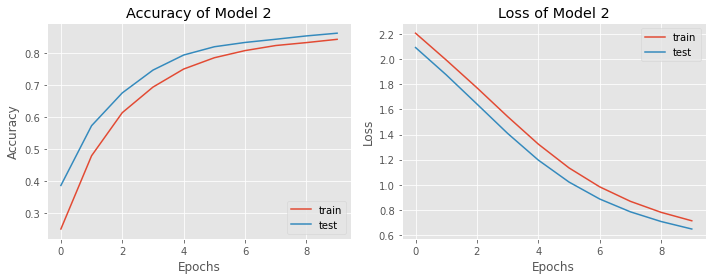

In [50]:
plot_history(history2)

### **Testing and Evaluating the model**

In [54]:
## lets start withmaking a few prediction
SAMPLES = 6 # test 6 samples from x_test

predictions = model_v2.predict(x_test[:SAMPLES]) ## actual prediction

# old function
prediction_classes = model_v2.predict_classes(x_test[:SAMPLES])  ## class predictions old function now deprecated

In [59]:
print(predictions)
print(predictions.round(2))

[[6.35794736e-03 1.65769667e-03 7.89082702e-03 1.57757569e-02
  1.24972761e-02 1.17959147e-02 1.61792792e-03 8.55149150e-01
  1.02492310e-02 7.70082101e-02]
 [1.21961296e-01 8.79726280e-03 4.56242114e-01 1.24355718e-01
  1.63617730e-03 1.11843459e-01 7.49568194e-02 1.10196834e-03
  9.81919318e-02 9.13338677e-04]
 [3.30109545e-03 8.23105752e-01 4.51493561e-02 2.16083843e-02
  1.11856675e-02 8.56123865e-03 1.79967936e-02 1.73893087e-02
  3.87109816e-02 1.29915122e-02]
 [9.46298063e-01 6.98552685e-05 6.06244942e-03 4.25364682e-03
  6.84353872e-04 2.11184788e-02 1.43791744e-02 3.83435679e-03
  2.33546109e-03 9.64155886e-04]
 [1.45688001e-02 2.69638863e-03 3.61199714e-02 1.12414332e-02
  6.52290046e-01 2.48063374e-02 4.78711240e-02 4.77348454e-02
  2.45824941e-02 1.38088524e-01]
 [7.74722081e-04 9.14938807e-01 1.83771048e-02 1.30132800e-02
  5.04194386e-03 2.98887980e-03 3.20653105e-03 1.28204077e-02
  2.13498995e-02 7.48858228e-03]]
[[0.01 0.   0.01 0.02 0.01 0.01 0.   0.86 0.01 0.08]
 [0.

In [61]:
prediction_classes = np.argmax(predictions, axis=-1)
print(prediction_classes)

[7 2 1 0 4 1]


In [62]:
## now lets check the actual labels from y_test
print(y_test[:SAMPLES])

[[0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]
 [0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]]


In [64]:
## extract the labels classes from y_test
actual_classes = np.argmax(y_test[:SAMPLES], axis=-1)
print(actual_classes)

[7 2 1 0 4 1]


#### **Now lets do that with all the test images**

In [67]:
score = model_v2.evaluate(x_test, y_test, return_dict=True)

313/313 [==============================] - 1s 3ms/step - loss: 0.6481 - accuracy: 0.8626


In [68]:
score

{'accuracy': 0.8626000285148621, 'loss': 0.6481156945228577}

### **Visualize the predictions**

In [83]:
def show_images(samples, predicted):
  fig = plt.figure(figsize=(6, 6))
  for i, image in enumerate(samples):
    plt.subplot(3, 3, i+1)
    image = image.reshape(28, 28) * 255
    plt.imshow(image, cmap='gray', interpolation='none')
    plt.title(f"Predicted {predicted[i]}")
    plt.grid(False)
    plt.xticks([])

  plt.tight_layout()
  fig.show();

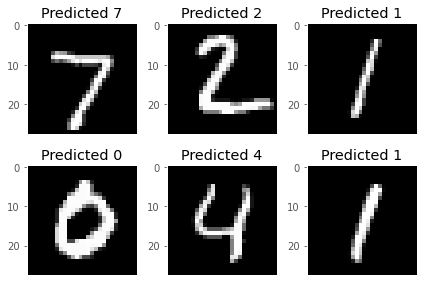

In [84]:
show_images(x_test[:SAMPLES], prediction_classes)